[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Linear Classifier MOONs

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 02/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0027LinearClassifierTraining.ipynb)

In [18]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_moons

# Image Processing

# Machine Learning


# Miscellaneous
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, List, Tuple

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from bokeh.plotting import figure, show

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [19]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [20]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [21]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import Plot2DLinearClassifier, PlotBinaryClassData


In [22]:
# General Auxiliary Functions



In [23]:
# Parameters

# Data Generation
numSamples = 500
noiseLevel = 0.1

# Data Visualization
numGridPts = 250

## Generate / Load Data

We'll use the the classic _moons_ data set.  
By default it labels the data ${y}_{i} \in \left\{ 0, 1 \right\}$.  
We'll transform it into ${y}_{i} \in \left\{ -1, 1 \right\}$.

In [24]:
# Generate Data 
mX, vY = make_moons(n_samples = numSamples, noise = noiseLevel)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (500, 2)
The labels data shape: (500,)


In [25]:
# The Labels
# The labels of the data
print(f'The unique values of the labels: {np.unique(vY)}')

The unique values of the labels: [0 1]


* <font color='red'>(**?**)</font> Do the labels fit the model? What should be done?

In [26]:
# Labels Transformation
# Transforming the Labels into {-1, 1}
vY[vY == 0] = -1

In [27]:
# The Labels
# The updated labels
print(f'The unique values of the labels: {np.unique(vY)}')

The unique values of the labels: [-1  1]


### Plot the Data

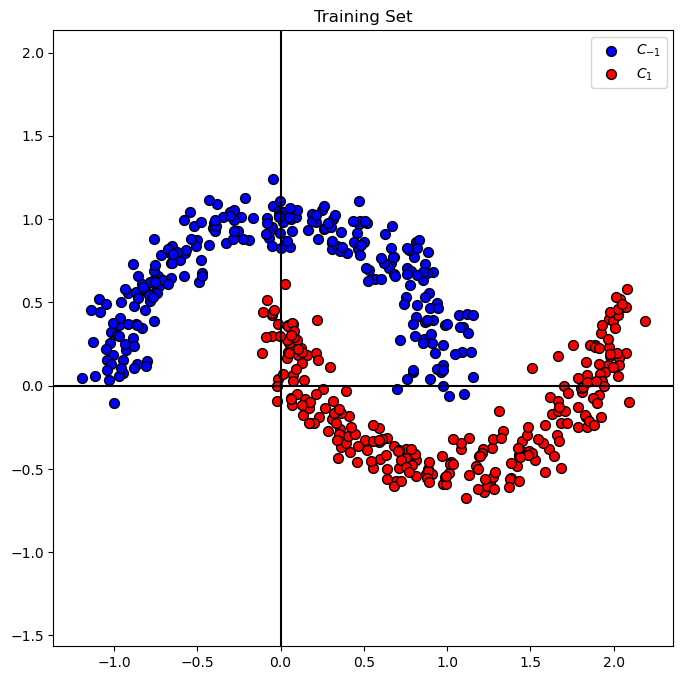

In [28]:
# Plot the Data

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Training Set')

## Linear Classifier Training

$$ {f}_{\left( \boldsymbol{w} \right)} \left( \boldsymbol{x} \right) = \mathrm{sign} \left( \boldsymbol{w}^{T} \boldsymbol{x} \right) $$


### Training Optimization Problem

In ideal world, we'd like to optimize:

$$ \hat{ \boldsymbol{w} } = \arg \min_{\boldsymbol{w}} {\left\| \operatorname{sign} \left( \boldsymbol{X} \boldsymbol{w} \right) - \boldsymbol{y} \right\|}_{2}^{2} $$

Where

$$
\boldsymbol{X} = \begin{bmatrix} -1 & - & x_{1} & -\\
-1 & - & x_{2} & -\\
 & \vdots \\
-1 & - & x_{N} & -
\end{bmatrix} \in \mathbb{R}^{N \times 3}
$$

In [29]:
# Stack the constant column into `mX`
mX = np.column_stack((-np.ones(numSamples), mX))
mX

array([[-1.        ,  0.75042724,  0.53523666],
       [-1.        , -0.1674125 ,  1.00862292],
       [-1.        ,  0.22313782,  0.87931898],
       ...,
       [-1.        ,  1.48488659, -0.24967477],
       [-1.        ,  1.59026907, -0.2386105 ],
       [-1.        ,  1.89492566,  0.0257667 ]])

* <font color='red'>(**?**)</font> What are the dimensions of `mX`?

In [30]:
# The updated dimensions
print(f'The features data shape: {mX.shape}')

The features data shape: (500, 3)


Yet, since the $\operatorname{sign} \left( \cdot \right)$ isn't smooth nor continuous we need to approximate it.  
The classic candidate is the [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function) (Member of the _S Shaped_ function family):

$$ \sigma \left( x \right) = 2 \frac{ \exp \left( x \right) }{ 1 + \exp \left( x \right) } - 1 = 2 \frac{ 1 }{ 1 + \exp \left( -x \right) } - 1 $$

See [`scipy.special.expit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html) for $\frac{ 1 }{ 1 + \exp \left( -x \right) }$.

* <font color='brown'>(**#**)</font> In practice such function requires numerical stable implementation. Use professionally made implementations if available. 

The Sigmoid Function derivative is given by:

$$ \frac{\mathrm{d} \sigma \left( x \right) }{\mathrm{d} x} = 2 \frac{ \exp \left( x \right)}{\left( 1 + \exp \left( x \right) \right)^{2}} = 2 \left( \frac{ 1 }{ 1 + \exp \left( -x \right) } \right) \left( 1 - \frac{ 1 }{ 1 + \exp \left( -x \right) } \right) $$

* <font color='brown'>(**#**)</font> For derivation of the last step, see https://math.stackexchange.com/questions/78575.

### The Loss Function

Then, using the Sigmoid approximation the loss function becomes (With mean over all data samples $N$):

$$ \hat{ \boldsymbol{w} } = \arg \min_{\boldsymbol{w}} J \left( \boldsymbol{w} \right) = \arg \min_{\boldsymbol{w}} \frac{1}{4 N} {\left\| \sigma \left( \boldsymbol{X} \boldsymbol{w} \right) - \boldsymbol{y} \right\|}_{2}^{2} $$

The gradient becomes:

$$\nabla_{\boldsymbol{w}} J \left( \boldsymbol{w} \right) = \frac{1}{2N} \boldsymbol{X}^{T} \operatorname{Diag} \left( \sigma' \left( \boldsymbol{X} \boldsymbol{w} \right) \right) \left( \sigma \left( \boldsymbol{X} \boldsymbol{w}\right) - \boldsymbol{y} \right) $$

* <font color='red'>(**?**)</font> Is the problem _convex_?  
* <font color='brown'>(**#**)</font> For classification the _Squared ${L}^{2}$ Loss is replaced with _Cross Entropy Loss_ which has better properties in the context of optimization for classification.
* <font color='brown'>(**#**)</font> For information about the objective function in the context of classification see [Stanley Chan - Purdue University - ECE595 / STAT598: Machine Learning I Lecture 14 Logistic Regression](https://engineering.purdue.edu/ChanGroup/ECE595/files/Lecture14_logistic.pdf).

In [31]:
# Defining the Functions

def SigmoidFun( vX: np.ndarray ):
    
    return (2 * sp.special.expit(vX)) - 1

def GradSigmoidFun(vX: np.ndarray):

    vExpit = sp.special.expit(vX)
    
    return 2 * vExpit * (1 - vExpit)

def LossFun(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray):

    numSamples = mX.shape[0]

    vR = SigmoidFun(mX @ vW) - vY
    
    return np.sum(np.square(vR)) / (4 * numSamples)

def GradLossFun(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray):

    numSamples = mX.shape[0]
    
    return (mX.T * GradSigmoidFun(mX @ vW).T) @ (SigmoidFun(mX @ vW) - vY) / (2 * numSamples)

### The Gradient Descent

$$ \boldsymbol{w}_{k + 1} = \boldsymbol{w}_{k} - \mu \nabla_{\boldsymbol{w}} J \left( \boldsymbol{w}_{k} \right) $$


In [32]:
# Gradient Descent

# Parameters
K   = 1000 #<! Num Steps
µ   = 0.10 #<! Step Size
vW  = np.array([0.0, -1.0, 2.0]) #<! Initial w

mW = np.zeros(shape = (vW.shape[0], K)) #<! Model Parameters (Weights)
vE = np.full(shape = K, fill_value = None) #<! Errors
vL = np.full(shape = K, fill_value = None) #<! Loss

vHatY = np.sign(mX @ vW) #<! Apply the classifier

mW[:, 0]    = vW
vE[0]       = np.mean(vHatY != vY)
vL[0]       = LossFun(mX, vW, vY)

for kk in range(1, K):
    vW -= µ * GradLossFun(mX, vW, vY)
    
    mW[:, kk]   = vW

    vHatY = np.sign(mX @ vW) #<! Apply the classifier
    
    vE[kk]      = np.mean(vHatY != vY) #<! Mean Error
    vL[kk]      = LossFun(mX, vW, vY) #<! Loss Function

In [33]:
# Plotting Function

# Grid of the data support
vV       = np.linspace(-2, 2, numGridPts)
mX1, mX2 = np.meshgrid(vV, vV)

def PlotLinClassTrain(itrIdx, mX, mW, vY, K, µ, vE, vL, mX1, mX2):

    hF, _ = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

    hA1, hA2 = hF.axes[0], hF.axes[1]

    # hA1.cla()
    # hA2.cla()
    
    Plot2DLinearClassifier(mX, vY, mW[:, itrIdx], mX1, mX2, hA1)

    vEE = vE[:itrIdx]
    vLL = vL[:itrIdx]

    hA2.plot(vEE, color = 'k', lw = 2, label = r'$J \left( w \right)$')
    hA2.plot(vLL, color = 'm', lw = 2, label = r'$\tilde{J} \left( w \right)$')
    hA2.set_title('Objective Function')
    hA2.set_xlabel('Iteration Index')
    hA2.set_ylabel('Value')
    hA2.set_xlim((0, K - 1))
    hA2.set_ylim((0, 1))
    hA2.grid()
    hA2.legend()
        
    # hF.canvas.draw()
    plt.show()

In [34]:
# Display the Optimization Path
# hF, hA = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
# hPlotLinClassTrain = lambda itrIdx: PlotLinClassTrain(itrIdx, mX, mW, vY, K, µ, vE, vL, mX1, mX2, hF)
hPlotLinClassTrain = lambda itrIdx: PlotLinClassTrain(itrIdx, mX[:, 1:], mW, vY, K, µ, vE, vL, mX1, mX2)
kSlider = IntSlider(min = 0, max = K - 1, step = 1, value = 0, layout = Layout(width = '30%'))
interact(hPlotLinClassTrain, itrIdx = kSlider)

# plt.show()


interactive(children=(IntSlider(value=0, description='itrIdx', layout=Layout(width='30%'), max=999), Output())…

<function __main__.<lambda>(itrIdx)>

<font color='blue'>(**!**)</font> Optimize the parameters $K$ and $\mu$ to achieve accuracy of `~85%` with the least steps.